<a href="https://colab.research.google.com/github/AviralTripathim22ma012/CV-2/blob/main/panorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**checking how much rotation and scaling is required for the thierd image (after hit and trial i found that image was rotated by 4 degrees, and scaling of 1.09)**

after rotation of 4 degrees, and scaled by a factor of 1.09


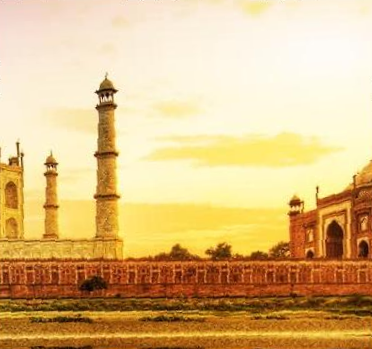

before rotatipn


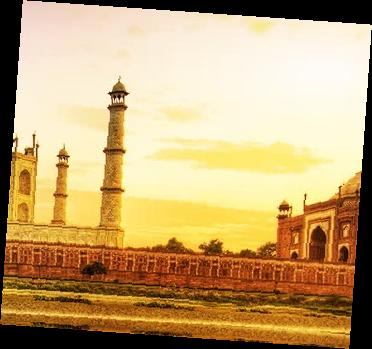

In [ ]:
''''checking how much rotation is required'''
import cv2
from google.colab.patches import cv2_imshow

img3 = cv2.imread('/content/1c.jpeg')

img3_rotated= img3.copy()
rows, cols = img3_rotated.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 4, 1.09)
img3_rotated = cv2.warpAffine(img3_rotated, M, (cols,rows))

print("after rotation of 4 degrees, and scaled by a factor of 1.09")
cv2_imshow(img3_rotated)
print("before rotatipn")
cv2_imshow(img3)

**without performing rotation and scaling in the 3rd image**

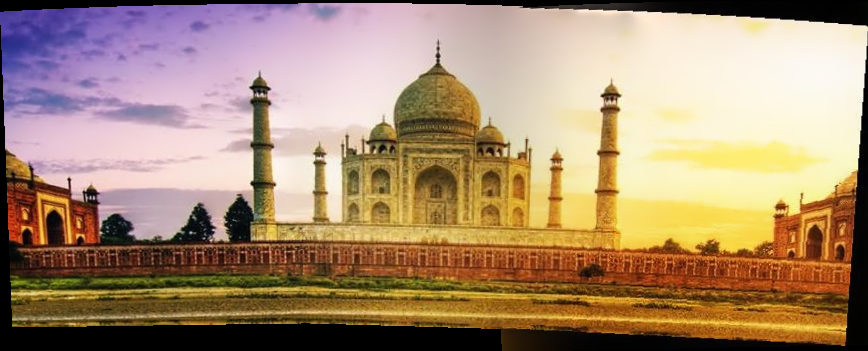

In [ ]:
'''#stiching without rotation'''
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

'''# Load the images'''
img1 = cv2.imread('/content/1a.jpeg')
img2 = cv2.imread('/content/1b.jpeg')
img3 = cv2.imread('/content/1c.jpeg')

'''# Rotate the third image'''
# rows, cols = img3.shape[:2]
# M = cv2.getRotationMatrix2D((cols/2,rows/2), 4, 1)
# img3 = cv2.warpAffine(img3, M, (cols,rows))

'''# Stitch the images together'''
stitcher = cv2.Stitcher_create()
result = stitcher.stitch((img1, img2, img3))

'''# Show the result'''
cv2_imshow(result[1])
cv2.waitKey(0)
cv2.destroyAllWindows()


**with rotation and scaling in the 3rd image**

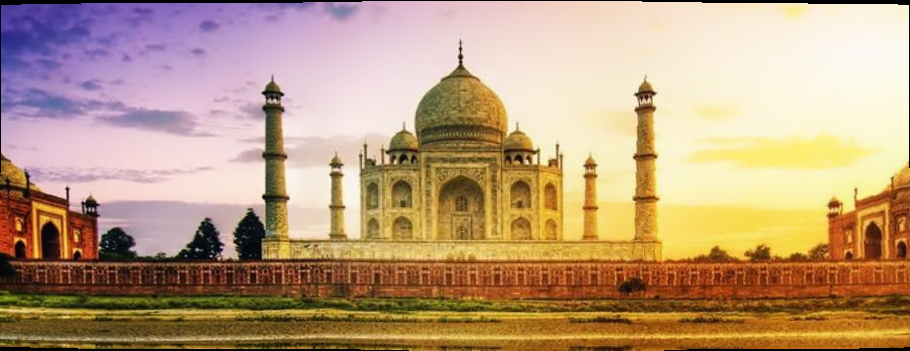

In [ ]:
'''#stiching with rotation of 4 degrees'''
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

'''# Load the images'''
img1 = cv2.imread('/content/1a.jpeg')
img2 = cv2.imread('/content/1b.jpeg')
img3 = cv2.imread('/content/1c.jpeg')

'''# Rotate the third image'''
rows, cols = img3.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 4, 1.09)
img3 = cv2.warpAffine(img3, M, (cols,rows))

'''# Stitch the images together'''
stitcher = cv2.Stitcher_create()
result = stitcher.stitch((img1, img2, img3))

'''# Show the result'''
cv2_imshow(result[1])
cv2.waitKey(0)
cv2.destroyAllWindows()


**using RANSAC and SIFT for keypoint detection and homography (this method doesnt works)**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

'''# Load the images'''
image1 = cv2.imread('/content/1a.jpeg')
image2 = cv2.imread('/content/1b.jpeg')
image3 = cv2.imread('/content/1c.jpeg')

'''#rotation the thierd image by 4 degrees and scaling by a factor of 1.09'''
rows, cols = img3.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 4, 1.09)
image3 = cv2.warpAffine(image3, M, (cols,rows))

'''# Create a SIFT object'''
sift = cv2.SIFT_create()

'''# Detect keypoints and compute descriptors for each image'''
kp1, desc1 = sift.detectAndCompute(image1, None)
kp2, desc2 = sift.detectAndCompute(image2, None)
kp3, desc3 = sift.detectAndCompute(image3, None)

'''# Create a FLANN-based matcher'''
matcher = cv2.FlannBasedMatcher()

'''# Match descriptors between the images'''
matches1_2 = matcher.match(desc1, desc2)
matches2_3 = matcher.match(desc2, desc3)

'''# Apply ratio test to keep only good matches'''
matches1_2 = [match for match in matches1_2 if match.distance < 0.7 * np.min([m.distance for m in matches1_2])]
matches2_3 = [match for match in matches2_3 if match.distance < 0.7 * np.min([m.distance for m in matches2_3])]

'''# Check if we have enough matches to compute Homography'''
if len(matches1_2) >= 4 and len(matches2_3) >= 4:
    # Compute Homography using RANSAC
    src_pts1 = np.float32([kp1[match.queryIdx].pt for match in matches1_2]).reshape(-1, 1, 2)
    dst_pts1 = np.float32([kp2[match.trainIdx].pt for match in matches1_2]).reshape(-1, 1, 2)
    H1, mask1 = cv2.findHomography(src_pts1, dst_pts1, cv2.RANSAC, 5.0)

    src_pts2 = np.float32([kp2[match.queryIdx].pt for match in matches2_3]).reshape(-1, 1, 2)
    dst_pts2 = np.float32([kp3[match.trainIdx].pt for match in matches2_3]).reshape(-1, 1, 2)
    H2, mask2 = cv2.findHomography(src_pts2, dst_pts2, cv2.RANSAC, 5.0)

    # Combine Homography matrices
    H_total = np.dot(H2, H1)

    # Warp the first image using Homography matrix
    h, w = image1.shape[:2]
    warp_image1 = cv2.warpPerspective(image1, H_total, (w + image2.shape[1] + image3.shape[1], h))
    warp_image1[0:image2.shape[0], 0:image2.shape[1]] = image2
    warp_image1[0:image3.shape[0], image2.shape[1]:image2.shape[1] + image3.shape[1]] = image3

    # Display the stitched image
    cv2_imshow(warp_image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Not enough matches to compute Homography")


Error: Not enough matches to compute Homography


**this method didn't work even after resizing all the images**

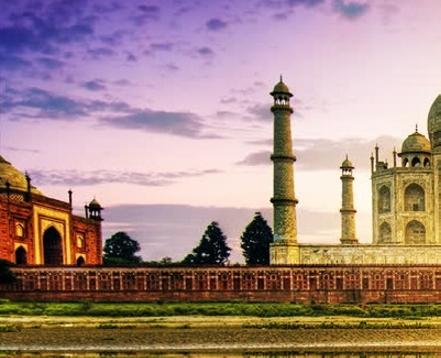

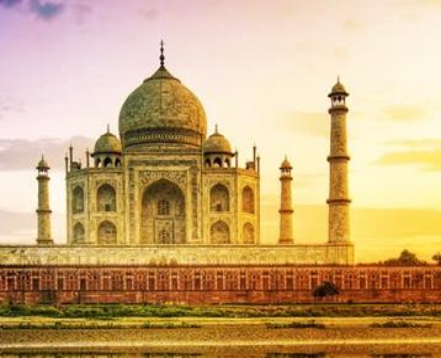

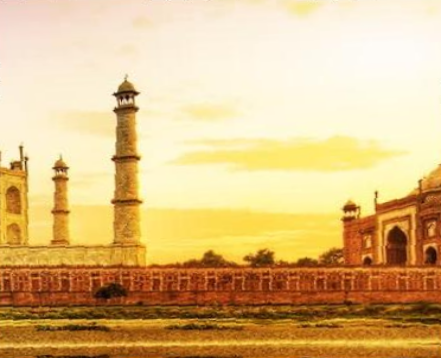

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the two images
image1 = cv2.imread('/content/1a.jpeg')
image2 = cv2.imread('/content/1b.jpeg')
image3 = cv2.imread('/content/1c.jpeg')
rows, cols = img3.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 4, 1.09)
image3 = cv2.warpAffine(image3, M, (cols,rows))

# Get the dimensions of the two images
height1, width1, _ = image1.shape
height2, width2, _ = image2.shape
height2, width2, _ = image3.shape

# If the two images have different sizes, resize them
if height1 != height2 or width1 != width2:
    # Compute the target size based on the larger of the two images
    target_height = max(height1, height2)
    target_width = max(width1, width2)

    # Resize the first image
    image1_resized = cv2.resize(image1, (target_width, target_height))

    # Resize the second image
    image2_resized = cv2.resize(image2, (target_width, target_height))

    image3_resized = cv2.resize(image3, (target_width, target_height))

else:
    # The two images have the same size, no need to resize
    image1_resized = image1
    image2_resized = image2
    image3_resized = image3

# Display the two resized images
cv2_imshow(image1_resized)
cv2_imshow(image2_resized)
cv2_imshow(image3_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

'''# Load the images'''
image1 = image1_resized
image2 = image2_resized
image3 = image2_resized

'''#rotation the thierd image by 4 degrees and scaling by a factor of 1.09'''
rows, cols = img3.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), 4, 1.09)
image3 = cv2.warpAffine(image3, M, (cols,rows))

'''# Create a SIFT object'''
sift = cv2.SIFT_create()

'''# Detect keypoints and compute descriptors for each image'''
kp1, desc1 = sift.detectAndCompute(image1, None)
kp2, desc2 = sift.detectAndCompute(image2, None)
kp3, desc3 = sift.detectAndCompute(image3, None)

'''# Create a FLANN-based matcher'''
matcher = cv2.FlannBasedMatcher()

'''# Match descriptors between the images'''
matches1_2 = matcher.match(desc1, desc2)
matches2_3 = matcher.match(desc2, desc3)

'''# Apply ratio test to keep only good matches'''
matches1_2 = [match for match in matches1_2 if match.distance < 0.7 * np.min([m.distance for m in matches1_2])]
matches2_3 = [match for match in matches2_3 if match.distance < 0.7 * np.min([m.distance for m in matches2_3])]

'''# Check if we have enough matches to compute Homography'''
if len(matches1_2) >= 4 and len(matches2_3) >= 4:
    # Compute Homography using RANSAC
    src_pts1 = np.float32([kp1[match.queryIdx].pt for match in matches1_2]).reshape(-1, 1, 2)
    dst_pts1 = np.float32([kp2[match.trainIdx].pt for match in matches1_2]).reshape(-1, 1, 2)
    H1, mask1 = cv2.findHomography(src_pts1, dst_pts1, cv2.RANSAC, 5.0)

    src_pts2 = np.float32([kp2[match.queryIdx].pt for match in matches2_3]).reshape(-1, 1, 2)
    dst_pts2 = np.float32([kp3[match.trainIdx].pt for match in matches2_3]).reshape(-1, 1, 2)
    H2, mask2 = cv2.findHomography(src_pts2, dst_pts2, cv2.RANSAC, 5.0)

    # Combine Homography matrices
    H_total = np.dot(H2, H1)

    # Warp the first image using Homography matrix
    h, w = image1.shape[:2]
    warp_image1 = cv2.warpPerspective(image1, H_total, (w + image2.shape[1] + image3.shape[1], h))
    warp_image1[0:image2.shape[0], 0:image2.shape[1]] = image2
    warp_image1[0:image3.shape[0], image2.shape[1]:image2.shape[1] + image3.shape[1]] = image3

    # Display the stitched image
    cv2_imshow(warp_image1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Not enough matches to compute Homography")


Error: Not enough matches to compute Homography
